# Analysis for Family Tree

In [1]:
#!pip3 install python-gedcom
from gedcom import Gedcom
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import datetime
from collections import Counter

In [2]:
gedcom = Gedcom('tree.ged')

In [13]:
all_records = gedcom.get_root_child_elements()
name = []
bdate = []
gender = []
deceased = []
marriage = []
parents = []
#spouse = []
#children = []

count=1
for record in all_records:
    if record.is_individual():
        (first, last) = record.get_name()
        #uncomment below while running
        #name.append(first+" "+last) 
        
        #Comment out below line while running for actual data
        name.append("Fname"+str(count)+" Lname"+str(count))
        bdate.append(record.get_birth_data()[0])
        gender.append(record.get_gender())
        deceased.append(record.is_deceased())
        if len(gedcom.get_marriages(record)) > 0:
            marriage.append(gedcom.get_marriages(record)[0][0])
        else:
            marriage.append("No")
        
        par = gedcom.get_parents(record)
        temp = ""
        if len(par) > 0:
            for p in par:
                (first, last) = p.get_name()
                #uncomment below while running
                #temp = temp+" & "+first+" "+last
                
                #Comment out below line while running for actual data
                temp = "  Pname for Fname"+str(count)
            temp = temp[2:]  
        parents.append(temp)
        
        count+=1

In [14]:
data = pd.DataFrame(
    {'name': name,
     'bday': bdate,
     'gender': gender,
     'deceased': deceased,
     'marriage': marriage,
     'parents': parents,
     #'spouse': spouse,
     #'children': children
    })

In [15]:
data.head()

,name,bday,gender,deceased,marriage,parents
0,Fname1 Lname1,1 JUL 1991,M,False,No,Pname for Fname1
1,Fname2 Lname2,1 JUL 1963,F,False,No,Pname for Fname2
2,Fname3 Lname3,11 JUN 1959,M,False,No,Pname for Fname3
3,Fname4 Lname4,13 JUN 1987,M,False,24 NOV 2016,Pname for Fname4
4,Fname5 Lname5,,M,True,No,


In [16]:
data = data.fillna('')
nan_rows = data[data.isnull().any(1)]

In [17]:
data['d_bday'] = pd.to_datetime(data['bday'])

## Male vs Female

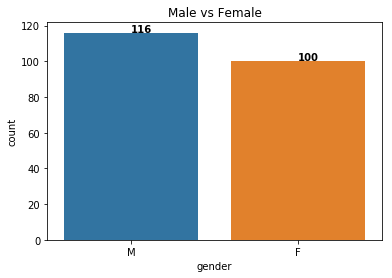

In [18]:
sns.countplot(data['gender'])
plt.title("Male vs Female")

for i,v in enumerate(data['gender'].value_counts()):
    plt.text(i, v+0.5, v , color='black', fontweight='bold')

plt.show()

## Names of all members of family

In [19]:
all_names = []
for record in data['name'].values:
    all_names.append(record.strip().replace(" ","_"))

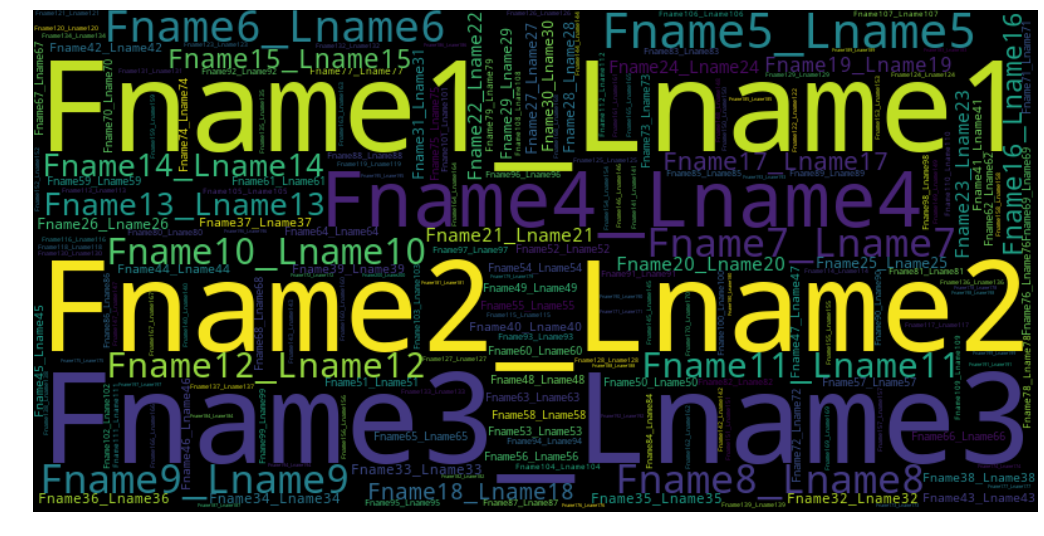

In [20]:
wordcloud = WordCloud(width=800, height=400).generate(str(all_names).replace("'",""))
plt.figure(figsize=(18,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## 80's Kids

In [21]:
kids_80s = []
for i in data[data['bday'].str.contains("198")]['name']:
    kids_80s.append(i.strip().replace(" ","_"))

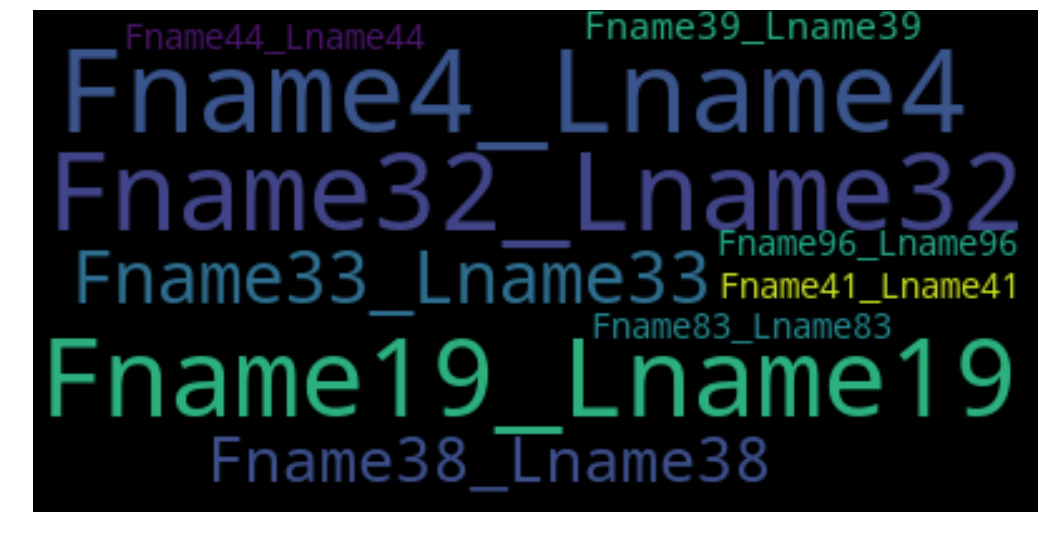

In [22]:
wordcloud = WordCloud(width=400, height=200).generate(str(kids_80s).replace("'",""))
plt.figure(figsize=(18,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## 90's Kids

In [23]:
kids_90s = []
for i in data[data['bday'].str.contains("199")]['name']:
    kids_90s.append(i.strip().replace(" ","_"))

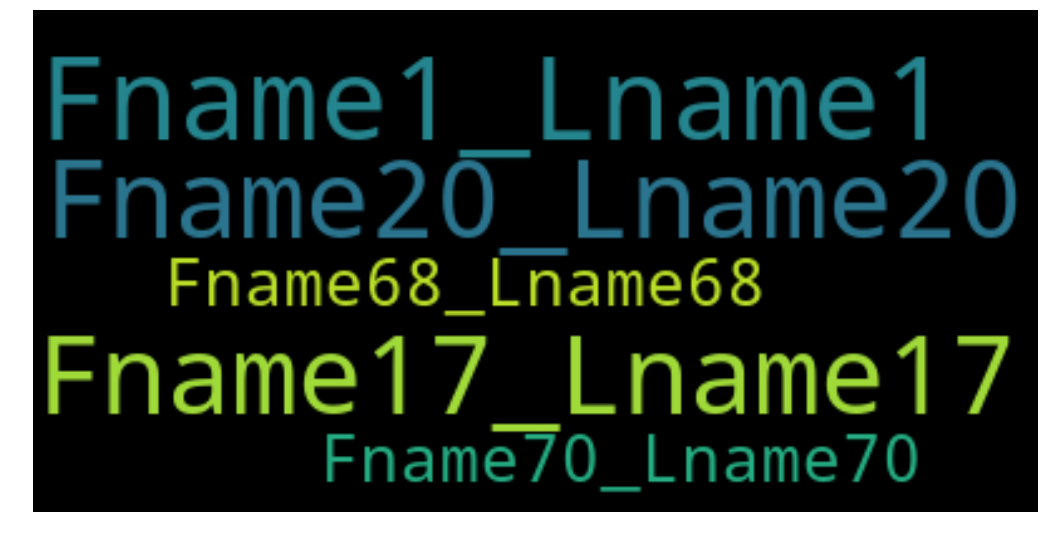

In [24]:
wordcloud = WordCloud(width=400, height=200).generate(str(kids_90s).replace("'",""))
plt.figure(figsize=(18,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Newest & Oldest

In [25]:
print("Newest member to the family is",data.iloc[data['d_bday'].idxmax()]['name'],\
      "born on",data.iloc[data['d_bday'].idxmax()]['bday'],\
      "to",data.iloc[data['d_bday'].idxmax()]['parents'])

Newest member to the family is Fname91 Lname91 born on 27 NOV 2018 to Pname for Fname91


In [26]:
temp = data[data['deceased']==False]
print("Oldest member of the family is",data.iloc[temp['d_bday'].idxmin()]['name'],\
      "born on",data.iloc[temp['d_bday'].idxmin()]['bday'])

Oldest member of the family is Fname28 Lname28 born on 20 JAN 1940


## Youngest 

In [27]:
sorted_data=temp.sort_values('d_bday', axis=0, ascending=True, \
            inplace=False, kind='quicksort', na_position='last')
sorted_data = sorted_data[sorted_data.isnull().any(1) == False]

In [28]:
print("Youngest members are: \n")
print(sorted_data.tail(5)[['name','bday']])

Youngest members are: 

               name         bday
51  Fname52 Lname52     APR 2008
64  Fname65 Lname65  13 OCT 2011
65  Fname66 Lname66         2013
46  Fname47 Lname47  14 MAY 2018
90  Fname91 Lname91  27 NOV 2018


In [29]:
print("Oldest members are: \n")
print(sorted_data.head(5)[['name','bday']])

Oldest members are: 

               name         bday
27  Fname28 Lname28  20 JAN 1940
33  Fname34 Lname34   1 JAN 1942
11  Fname12 Lname12  16 MAY 1944
10  Fname11 Lname11   5 FEB 1947
20  Fname21 Lname21  12 JUL 1948


## Birth Months

In [30]:
cnt = Counter()
for month in ['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']:
    cnt[month] = 0

for record in data['bday'].values:
    if len(record.split(" ")) > 2:
        cnt[record.split(" ")[1].upper()]+= 1

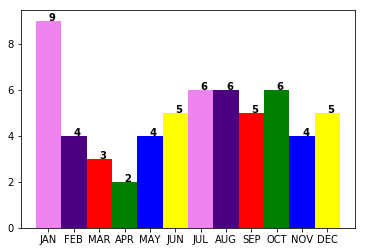

In [31]:
labels, values = zip(*cnt.items())

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width, color=['violet','indigo', 'red', 'green', 'blue', 'yellow'])
plt.xticks(indexes, labels)
for i,v in enumerate(values):
    plt.text(i, v, v , color='black', fontweight='bold')
plt.show()